<a href="https://colab.research.google.com/github/janinerottmann/Practical-Data-Science/blob/master/1.%20Programming%20Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Practical Data Science 19/20*
# Programming Assignment

In this programming assignment you need to apply your new `numpy`, `pandas` and `matplotlib` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html)`s to solve the task. 

Load required packages

In [0]:
import pandas as pd
%matplotlib inline 

Load Data

In [0]:
DATA_URL = 'https://raw.githubusercontent.com/pds1920/_a1-template/master/data/'

transactions    = pd.read_csv(DATA_URL + '/sales_train.csv.gz')
items           = pd.read_csv(DATA_URL + '/items.csv')
item_categories = pd.read_csv(DATA_URL + '/item_categories.csv')

## Get to know the data
Print the **shape** of the loaded dataframes.
- You can use a list comprehension here

In [0]:
all_df = [transactions, items, item_categories]

for df in range(0,len(all_df)):
  shapes_df = all_df[df].shape
  print(shapes_df)
  
shapes_df

(1400001, 6)
(22170, 3)
(84, 2)


(84, 2)

Use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows of each data frame.  Examine the features you are given.

In [0]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,14.10.2013,9,19,7204,199.0,1.0
1,23.10.2013,9,19,7096,799.0,1.0
2,19.10.2013,9,19,7204,199.0,1.0
3,17.10.2013,9,19,7206,199.0,1.0
4,13.10.2013,9,19,7459,299.0,1.0


In [0]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [0]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


Now use your `pandas` skills to get answers for the following questions. 

## What was the maximum total revenue among all the shops in June, 2014?


* Revenue refers to total sales minus value of goods returned.
* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 6` in order to select target subset of dates.
* You may work with `date` feature as with strings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [0]:
# check for returned items
transactions_returned = transactions[transactions['item_cnt_day'] < 0]
transactions_returned.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
701,13.10.2013,9,18,15675,199.0,-1.0
1798,09.10.2013,9,57,6501,699.0,-1.0
2647,09.10.2013,9,17,6091,999.0,-1.0
3302,09.10.2013,9,57,4181,1090.0,-1.0
3381,10.10.2013,9,57,4241,999.0,-1.0


In [0]:
#split date in day, month, year
import datetime

transactions['month'] = pd.DatetimeIndex(transactions['date']).month
transactions['day'] = pd.DatetimeIndex(transactions['date']).day
transactions['year'] = pd.DatetimeIndex(transactions['date']).year

# filter transactions by june 2014
transactions_filtered = transactions[((transactions['year'] == 2014) 
                        & (transactions['month'] == 6))]

# revenue in june 2014
transactions_filtered['revenue'] = transactions_filtered['item_price']*transactions_filtered['item_cnt_day'].copy()

# revenue in june 2014 by shop
max_revenue = transactions_filtered.groupby('shop_id')['revenue'].sum() #sum substracts negativ revenues (due to returns)
max_revenue.sort_values(ascending=False).head(1) #shop with highest revenue in june 2014

shop_id
31    5761264.7
Name: revenue, dtype: float64

## How many items are there?

* Let's assume, that the items are returned for the same price as they had been sold

In [0]:
# number of prices per item
prices = transactions.groupby(['item_id'])['item_price'].nunique().to_frame()

# filter items with unique prices
num_items_constant_price = prices[prices['item_price'] == 1].shape[0]
num_items_constant_price

5651

## What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014?

* Do not count the items that were sold but returned back later.
* Fill `total_num_items_sold`: An (ordered) array that contains the total number of items sold on each day 
* Fill `days`: An (ordered) array that contains all relevant days
* Then compute variance of the of `total_num_items_sold`
* If there were no sales at a given day, ***do not*** impute missing value with zero, just ignore that day

In [0]:
# shop 25 data
shop_id = 25
sales_december_shop25 = transactions[(transactions['shop_id'] == shop_id) &
                        (transactions['year'] == 2014) &
                        (transactions['month'] == 12)]

# remove returned items
sales_without_returns = sales_december_shop25.drop_duplicates(subset = 'item_id', keep = False)

# number of items sold on each day
total_num_items_sold = sales_without_returns.groupby('day')['item_cnt_day'].sum()

# variance of sold items by day
total_num_items_sold_var = total_num_items_sold.var()

total_num_items_sold_var

1720.2540229885058

## Vizualization of the daily items sold

Use `total_num_items_sold` and `days` arrays to and plot the daily revenue of `shop_id = 25` in December, 2014.

* plot-title: 'Daily items sold for shop_id = 25'

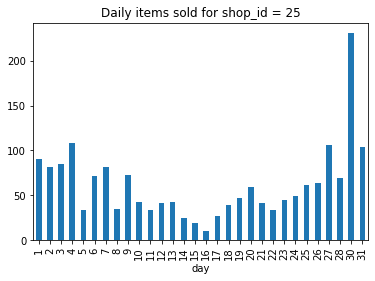

In [0]:
import numpy as np
total_num_items_sold.plot(kind='bar', x='day', title='Daily items sold for shop_id = 25');

## What item category that generated the highest revenue in spring 2014?</b></li>

   
Spring is the period from March to Mai.

In [0]:
# filter transactions in period form march to mai
spring_data = transactions[(transactions['year'] == 2014) &
                           (transactions['month'] >= 3) &
                           (transactions['month'] <= 5)]

# calculate revenues
spring_data.loc[:, 'revenue'] = spring_data['item_price'] * spring_data['item_cnt_day'].copy()

# add item catagories to data frame
item_categories.rename(columns = {'item_category_id': 'item_id'}, inplace = True)
data_combined = pd.merge(spring_data, item_categories, on = 'item_id', how = 'left')

# group by item
category_id_with_max_revenue = data_combined.groupby(['item_id', 'item_category_name'])['revenue'].sum().sort_values(ascending=False).head(1)

category_id_with_max_revenue


item_id  item_category_name   
77       Программы - Обучающие    104290.75
Name: revenue, dtype: float64